## Decision Tree Classification
This is an example of a decision tree classifier that I created using doctor data I got from Kaggle. The data is provided by PABLO M. GÓMEZ on Kaggle. I do not own any part of the dataset and all credit goes to the owner.

Source: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [26]:
df["Drug"].unique()
#df["Drug"].value_counts()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Here, we are trying to plot the scatter plot to find the best pairs for the initial roots. The 2 pairs that we found that had semblence of cluster groups is ["Na_to_K" , "Age"] and ["Sex", "BP"].

<AxesSubplot:xlabel='Na_to_K', ylabel='Age'>

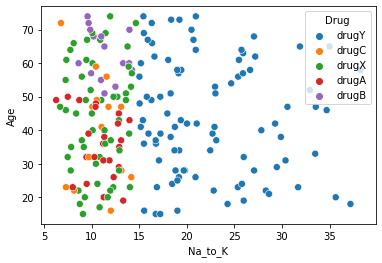

In [6]:
sns.scatterplot(x=df['Na_to_K'], y=df["Age"], hue=df["Drug"], s=50)

<AxesSubplot:xlabel='Sex', ylabel='BP'>

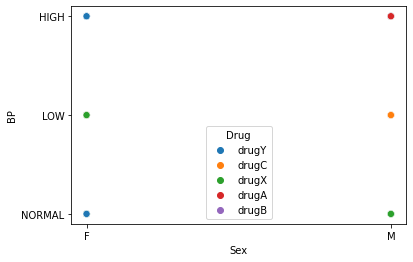

In [7]:
#	Age	Sex	BP	Cholesterol	Na_to_K	Drug
sns.scatterplot(x=df['Sex'], y=df["BP"], hue=df["Drug"], s=50)

<Axes: xlabel='Sex', ylabel='Na_to_K'>

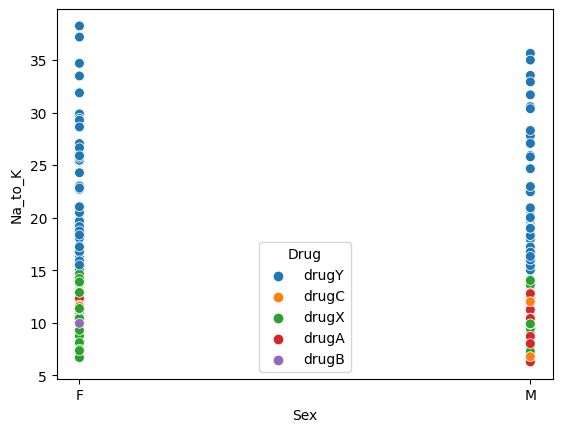

In [34]:
#	Age	Sex	BP	Cholesterol	Na_to_K	Drug
sns.scatterplot(x=df['Sex'], y=df["Na_to_K"], hue=df["Drug"], s=50)

### Converting string data to numeric data

In [8]:
df["Sex_New"] = df['Sex'].apply(lambda x:1 if x == "M" else 0)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_New
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,1
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,drugY,0


In [10]:
df["Cholesterol_New"] = df['Cholesterol'].apply(lambda x:1 if x == "HIGH" else 0)
df["BP_New"] = df['BP'].apply(lambda x: 1 if x == "HIGH" else (0 if x == "NORMAL" else -1))
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_New,Cholesterol_New,BP_New
0,23,F,HIGH,HIGH,25.355,drugY,0,1,1
1,47,M,LOW,HIGH,13.093,drugC,1,1,-1
2,47,M,LOW,HIGH,10.114,drugC,1,1,-1
3,28,F,NORMAL,HIGH,7.798,drugX,0,1,0
4,61,F,LOW,HIGH,18.043,drugY,0,1,-1


In [19]:
df['Na_to_K_New'] = df['Na_to_K'].astype(int)
df.dtypes

Age                  int64
Sex                 object
BP                  object
Cholesterol         object
Na_to_K            float64
Drug                object
Sex_New              int64
Cholesterol_New      int64
BP_New               int64
Na_to_K_New          int32
dtype: object

## Using the Classifier
Here we use `DecisionTreeClassifier` to create the tree and make the prediction

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
X = df[['Age','Sex_New','BP_New','Cholesterol_New','Na_to_K_New']]
y = df['Drug']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)

In [22]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [23]:
y_pred = dt.predict(X_test)
y_pred

array(['drugY', 'drugA', 'drugB', 'drugX', 'drugY', 'drugY', 'drugB',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB'], dtype=object)

## Visualise

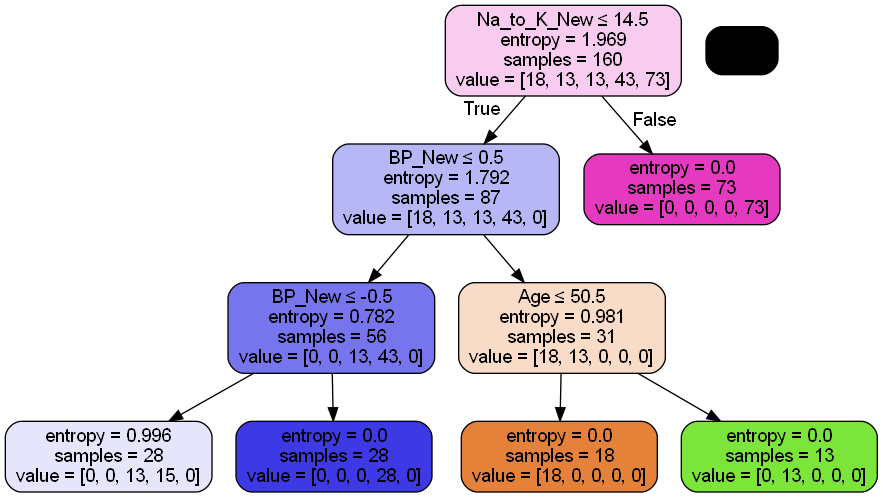

In [24]:
# Import libraries to visualize DT
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image

# Names of features (independent variables)
feature_cols = ['Age','Sex_New','BP_New','Cholesterol_New','Na_to_K_New']

# Generate the visualization of the DT, and write into the file 'irisTree.png'
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                    feature_names = feature_cols,  
                    filled = True, rounded = True,  
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('irisTree.png') 
Image(graph.create_png())

## Finding the Accuracy

In [25]:
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.92

The accuracy is not too bad, at 92%. We will be evaluating the model more in-depth and using the confusion matrix

In [27]:
# Import library to show confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
print(cnf_matrix)

[[18  0  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  3]]


In [28]:
confusion_test_df = pd.DataFrame(cnf_matrix, columns = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']\
                      , index =  ['drugY_Act', 'drugC_Act', 'drugX_Act', 'drugA-Act', 'drugB_Act'])
confusion_test_df

,drugY,drugC,drugX,drugA,drugB
drugY_Act,18,0,0,0,0
drugC_Act,0,0,3,0,0
drugX_Act,0,0,11,0,0
drugA-Act,0,0,0,5,0
drugB_Act,0,0,0,0,3


From the confusion matrix, we can see that most of the inputs were correctly predicted, however, certain inaccuracies were present. For Example, there were 3 predicted drugX but was actually drugC.

## Printing the Classification

In [30]:
# Import library to generate classification report
from sklearn.metrics import classification_report

# Get all possible values for the categorical variable 'class'
class_labels = df['Drug'].unique()

# Show classification report
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         3
       drugX       0.00      0.00      0.00         3
       drugA       0.79      1.00      0.88        11
       drugB       1.00      1.00      1.00        18

    accuracy                           0.93        40
   macro avg       0.76      0.80      0.78        40
weighted avg       0.87      0.93      0.89        40



C:\Users\ozjbr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ozjbr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ozjbr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Variance Importance

In [31]:
# Show the GINI importance of each feature
vi = dt.feature_importances_
print(vi)

[0.10592092 0.         0.33996986 0.         0.55410922]


### GINI Coefficient
"The Gini coefficient measures the probability of misclassifying a randomly chosen element from the set. It ranges from 0 to 1, where a Gini coefficient of 0 indicates that the set is completely pure (all elements belong to the same class), while a Gini coefficient of 1 indicates that the set is completely impure (elements are evenly distributed across all classes)." 
(Mr GPT)

In [32]:
# Show the GINI importance of each feature in an easier to read format
n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

Age   : 0.106
Sex_New   : 0.0
BP_New   : 0.34
Cholesterol_New   : 0.0
Na_to_K_New   : 0.554


From the coefficient, we can see that the impurities varies but "Na_to_K_New" and "BP_New" may not be the most desirable.